In [1]:
import pandas as pd
path = r'D:\DataSet\digit_recognizer\train.csv'
data = pd.read_csv(path)
x = data.iloc[:,1:]
y = data.iloc[:,0]

In [2]:
x.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [5]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC


In [8]:
#随机森林模型的实例化
RFC_ = RFC(n_estimators=10, random_state=0)

In [9]:
x_embedded = SelectFromModel(RFC_,threshold=0.005).fit_transform(x,y)

In [11]:
x_embedded.shape

(42000, 47)

In [12]:
#如何选取合适的阈值呢？
#可以采用学习曲线 
import numpy as np
import matplotlib.pyplot as plt

#所有的权重取值
RFC_IM = RFC_.fit(x,y).feature_importances_

In [14]:
#设计一些可能的阈值，进行调参
threshold = np.linspace(0,RFC_IM.max(),20)

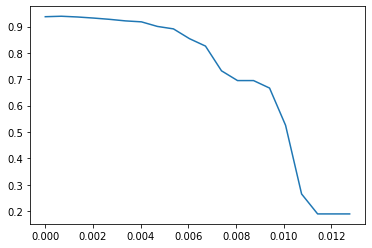

In [15]:
from sklearn.model_selection import cross_val_score
score = []
for i in threshold: 
    #模型实例化并fit，得到经过挑选选后的特征
    x_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(x,y) 
    once = cross_val_score(RFC_,x_embedded,y,cv=5).mean()
    score.append(once)
plt.plot(threshold,score)
plt.show()

In [16]:
x_embedded = SelectFromModel(RFC_,threshold=0.00067).fit_transform(x,y)

In [17]:
x_embedded.shape

(42000, 324)

In [18]:
cross_val_score(RFC_,x_embedded,y,cv=5).mean()

0.9391190476190475

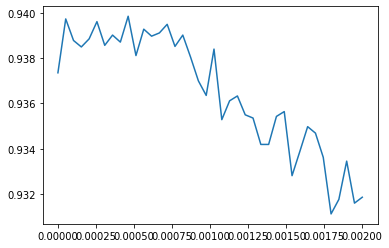

In [19]:
#如果觉得不够精确，还可以在更加细化的范围内使用同样的方法进行参数整定
score2 = []
for i in np.linspace(0,0.002,40): 
    #模型实例化并fit，得到经过挑选选后的特征
    x_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(x,y) 
    once = cross_val_score(RFC_,x_embedded,y,cv=5).mean()
    score2.append(once)


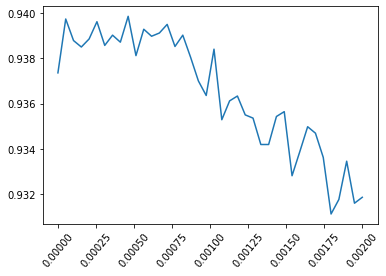

In [22]:
plt.plot(np.linspace(0,0.002,40),score2)
plt.xticks(rotation=50)
plt.show()